In [5]:
import pandas as pd
from PIL import Image
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import seaborn as sns
import keras

In [15]:
# weather mapping function
def weatherName(i):
    if (i == 0):
        return "berembun"
    elif (i == 1):
        return "berkabut"
    elif (i == 2):
        return "hujan es"
    elif (i == 3):
        return "petir"
    elif (i == 4):
        return "hujan"
    elif (i == 5):
        return "pelangi"
    elif (i == 6):
        return "badai pasir"
    else:
        return "salju"

# weather code mapping function for data training
def weatherTrain(i):
    if (i < 200):
        return 0
    elif (i < 400):
        return 1
    elif (i < 600):
        return 2
    elif (i < 800):
        return 3
    elif (i < 1000):
        return 4
    elif (i < 1200):
        return 5
    elif (i < 1400):
        return 6
    else:
        return 7

# mapping for data training results (y_train)
y_train = np.array([weatherTrain(index) for index in range(0, 1600)], dtype=int)
y_train.reshape(-1,)
print(y_train.shape, y_train)


(1600,) [0 0 0 ... 7 7 7]


In [16]:
# data image preprocessing
# input training dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Train/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Train/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/fogsmog')], dtype=float)

join = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Train/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/hail')], dtype=float)

join = np.append(join, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Train/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/lightning')], dtype=float)

join = np.append(join, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Train/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rain')], dtype=float)

join = np.append(join, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Train/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rainbow')], dtype=float)

join = np.append(join, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Train/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/sandstorm')], dtype=float)

join = np.append(join, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Train/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/snow')], dtype=float)

# X_train result
X_train = np.append(join, snow,  0)

# check data training shape
print(X_train.shape, y_train.shape)

(1600, 150, 200, 3) (1600,)


In [27]:
# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),  
    layers.Dense(512, activation='relu'),
    layers.Dense(8, activation='softmax')
])


# using adam for optimizer function and sparse categorical crossentropy for loss function 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              
# using 20 epochs
history = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50/50 [==============================] - 24s 470ms/step - loss: 1.6887 - accuracy: 0.3419
Epoch 2/20
50/50 [==============================] - 23s 453ms/step - loss: 1.3075 - accuracy: 0.5412
Epoch 3/20
50/50 [==============================] - 23s 455ms/step - loss: 1.1594 - accuracy: 0.5913
Epoch 4/20
50/50 [==============================] - 23s 455ms/step - loss: 1.0341 - accuracy: 0.6456
Epoch 5/20
50/50 [==============================] - 23s 457ms/step - loss: 0.8964 - accuracy: 0.6900
Epoch 6/20
50/50 [==============================] - 23s 456ms/step - loss: 0.8829 - accuracy: 0.6988
Epoch 7/20
50/50 [==============================] - 23s 468ms/step - loss: 0.8446 - accuracy: 0.7144
Epoch 8/20
50/50 [==============================] - 24s 473ms/step - loss: 0.7207 - accuracy: 0.7613
Epoch 9/20
50/50 [==============================] - 23s 466ms/step - loss: 0.6410 - accuracy: 0.7831
Epoch 10/20
50/50 [==============================] - 23s 469ms/step - loss: 0.6061 - accura

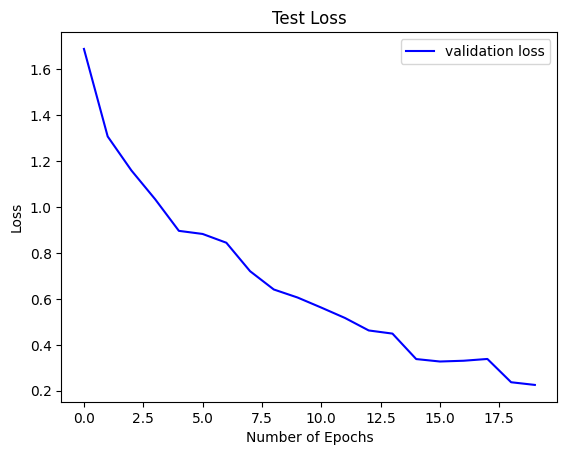

In [28]:
# evaluate loss
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
# weather code mapping function for data testing
def weatherTest(i):
    if (i < 20):
        return 0
    elif (i < 40):
        return 1
    elif (i < 60):
        return 2
    elif (i < 80):
        return 3
    elif (i < 100):
        return 4
    elif (i < 120):
        return 5
    elif (i < 140):
        return 6
    else:
        return 7

# mapping for data testing results (y_test)
y_test = np.array([weatherTest(index) for index in range(0, 160)], dtype=int)
y_test.reshape(-1,)
print(y_test.shape)
y_test

(160,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [31]:
# data image preprocessing
# input testing dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Test/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Test/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/fogsmog')], dtype=float)

gabung = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Test/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/hail')], dtype=float)

gabung = np.append(gabung, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Test/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/lightning')], dtype=float)

gabung = np.append(gabung, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Test/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rain')], dtype=float)

gabung = np.append(gabung, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Test/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rainbow')], dtype=float)

gabung = np.append(gabung, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Test/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/sandstorm')], dtype=float)

gabung = np.append(gabung, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Test/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/snow')], dtype=float)

# X_test result
X_test = np.append(gabung, snow,  0)

# check data testing shape
print(X_test.shape, y_test.shape)

(160, 150, 200, 3) (160,)


In [33]:
# evaluation of accuracy and loss using data test
cnn.evaluate(X_test,y_test)

5/5 [==============================] - 0s 92ms/step - loss: 0.8782 - accuracy: 0.7875


[0.8782414197921753, 0.7875000238418579]

In [34]:
# data accuracy per type of weather
from sklearn.metrics import classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# data report precision, recall, and f1-score values
print(classification_report(y_test, y_pred_classes))

5/5 [==============================] - 1s 97ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       1.00      0.90      0.95        20
           2       0.58      0.75      0.65        20
           3       0.90      0.90      0.90        20
           4       0.58      0.55      0.56        20
           5       0.95      0.95      0.95        20
           6       0.79      0.95      0.86        20
           7       0.64      0.45      0.53        20

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.78       160
weighted avg       0.79      0.79      0.78       160



In [54]:
# test results
n_test = 160
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(val) for val in y_pred]
print("n X_test data produces the following y_pred\n")

for x in range(5, n_test, 10):
  print(x, " = ", y_pred[x])

5/5 [==============================] - 1s 100ms/step
n X_test data produces the following y_pred

5  =  0
15  =  0
25  =  1
35  =  1
45  =  2
55  =  0
65  =  3
75  =  3
85  =  4
95  =  4
105  =  5
115  =  5
125  =  6
135  =  3
145  =  2
155  =  7


In [55]:
# actual results
print("n actual y_test data\n")
for x in range(5, n_test, 10):
  print(x, " = ", y_test[x])

n actual y_test data

5  =  0
15  =  0
25  =  1
35  =  1
45  =  2
55  =  2
65  =  3
75  =  3
85  =  4
95  =  4
105  =  5
115  =  5
125  =  6
135  =  6
145  =  7
155  =  7


actual y = petir
cnn y = petir


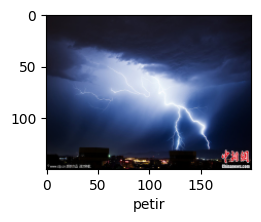

In [61]:
# testing
index = 75

# actual image
plt.figure(figsize=(15,2))
plt.imshow(X_test[index])
plt.xlabel(weatherName(y_test[index]))

# comparison of actual and cnn results
print("actual y =", weatherName(y_test[index]))
print("cnn y =", weatherName(y_pred[index]))

actual y = salju
cnn y = hujan es


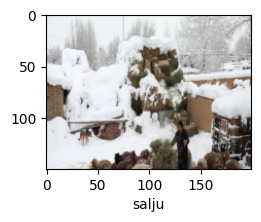

In [62]:
# testing
index = 145

# actual image
plt.figure(figsize=(15,2))
plt.imshow(X_test[index])
plt.xlabel(weatherName(y_test[index]))

# comparison of actual and cnn results
print("actual y =", weatherName(y_test[index]))
print("cnn y =", weatherName(y_pred[index]))